# Stock NeurIPS2018 Part 2. Train
This series is a reproduction of *the process in the paper Practical Deep Reinforcement Learning Approach for Stock Trading*. 

This is the second part of the NeurIPS2018 series, introducing how to use FinRL to make data into the gym form environment, and train DRL agents on it.

Other demos can be found at the repo of [FinRL-Tutorials]((https://github.com/AI4Finance-Foundation/FinRL-Tutorials)).

Stock NeurIPS2018 Part 2. 학습
이 시리즈는 Practical Deep Reinforcement Learning Approach for Stock Trading 논문에서 제시한 과정을 재현한 것입니다.

NeurIPS2018 시리즈의 두 번째 파트로, FinRL을 사용하여 데이터를 Gym 형식의 환경으로 변환하고, 그 환경에서 DRL 에이전트를 학습시키는 방법을 소개합니다.

기타 데모들은 FinRL-Tutorials 저장소에서 확인할 수 있습니다.

# Part 1. Install Packages

In [1]:
# ## install finrl library
# !pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

In [1]:
import pandas as pd
from stable_baselines3.common.logger import configure

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

check_and_make_directories([TRAINED_MODEL_DIR])

# Part 2. Build A Market Environment in OpenAI Gym-style

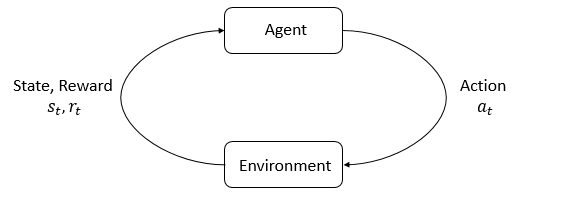

The core element in reinforcement learning are **agent** and **environment**. You can understand RL as the following process: 

The agent is active in a world, which is the environment. It observe its current condition as a **state**, and is allowed to do certain **actions**. After the agent execute an action, it will arrive at a new state. At the same time, the environment will have feedback to the agent called **reward**, a numerical signal that tells how good or bad the new state is. As the figure above, agent and environment will keep doing this interaction.

The goal of agent is to get as much cumulative reward as possible. Reinforcement learning is the method that agent learns to improve its behavior and achieve that goal.

To achieve this in Python, we follow the OpenAI gym style to build the stock data into environment.

state-action-reward are specified as follows:

* **State s**: The state space represents an agent's perception of the market environment. Just like a human trader analyzing various information, here our agent passively observes the price data and technical indicators based on the past data. It will learn by interacting with the market environment (usually by replaying historical data).

* **Action a**: The action space includes allowed actions that an agent can take at each state. For example, a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying. When an action operates multiple shares, a ∈{−k, ..., −1, 0, 1, ..., k}, e.g.. "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy. For example, it can be the change of the portfolio value when taking a at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively


**Market environment**: 30 constituent stocks of Dow Jones Industrial Average (DJIA) index. Accessed at the starting date of the testing period.

# 📈 Stock Trading with Reinforcement Learning (NeurIPS 2018 - Part 2)
이 시리즈는 논문 Practical Deep Reinforcement Learning Approach for Stock Trading의 과정을 재현한 것입니다. 이번 파트에서는 FinRL을 활용하여 데이터를 Gym 형식의 환경으로 구성하고, 그 위에서 DRL 에이전트를 학습시키는 방법을 다룹니다.

기타 예제는 FinRL-Tutorials에서 확인할 수 있습니다.

# 🧠 강화학습의 핵심 요소

강화학습(RL, Reinforcement Learning)의 핵심 요소는 **에이전트(Agent)**와 **환경(Environment)**입니다. RL은 다음과 같은 순환 과정으로 이해할 수 있습니다:

에이전트는 환경 안에서 활동합니다.

현재 상황을 **상태(state)**로 관찰합니다.

**행동(action)**을 선택하여 실행합니다.

그 결과로 새로운 상태로 이동하며,

환경으로부터 **보상(reward)**을 받습니다.

이러한 상호작용은 아래 그림처럼 반복되며, 에이전트는 보상을 최대화하는 방향으로 학습하게 됩니다.

# 🏗️ Gym 스타일 환경 구성
Python에서는 이 과정을 OpenAI Gym 스타일로 구성하여 실현합니다. 즉, 주식 데이터를 Gym 형식의 환경으로 구성하고, 상태-행동-보상을 다음과 같이 정의합니다.

✅ 상태 (State, s)
상태 공간은 에이전트가 시장을 인식하는 방식을 나타냅니다.

인간 트레이더가 과거 가격 데이터와 기술적 지표를 분석하듯, 에이전트도 이를 관찰합니다.

학습은 과거 데이터를 재생하며 환경과 상호작용하는 방식으로 진행됩니다.

🔁 행동 (Action, a)
행동 공간은 각 상태에서 에이전트가 취할 수 있는 행동을 정의합니다.

예: 𝑎 ∈ {−1, 0, 1}

−1: 매도

0: 유지

1: 매수

다수의 주식을 거래하는 경우: 𝑎 ∈ {−𝑘, ..., −1, 0, 1, ..., 𝑘}
예: "AAPL 주식 10주 매수" → 10, "AAPL 주식 10주 매도" → −10

# 💰 보상 (Reward, r(s, a, s′))
보상은 에이전트가 더 나은 정책을 학습하도록 유도하는 수치입니다.

보상 예시: 포트폴리오 가치의 변화량

𝑟(𝑠, 𝑎, 𝑠′) = 𝑣′ − 𝑣

여기서 𝑣, 𝑣′는 각각 상태 𝑠와 𝑠′에서의 포트폴리오 가치

# 🌍 시장 환경
사용 데이터: **다우존스 산업평균지수(DJIA)**의 30개 구성 종목

테스트 시작 시점의 데이터를 기준으로 구성된 시장 환경

# 🎯 에이전트의 목표
에이전트의 목표는 **누적 보상(cumulative reward)**을 가능한 한 많이 얻는 것입니다.
강화학습은 이 목표를 달성하기 위해 에이전트가 자신의 행동 방식을 지속적으로 개선하는 학습 방법입니다.



## Read data

We first read the .csv file of our training data into dataframe.

In [2]:
train = pd.read_csv('train_data.csv')
# If you are not using the data generated from part 1 of this tutorial, make sure 
# it has the columns and index in the form that could be make into the environment. 
# Then you can comment and skip the following two lines.
train = train.set_index(train.columns[0])
train.index.names = ['']

## Construct the environment

Calculate and specify the parameters we need for constructing the environment.

"환경을 구성하기 위해 필요한 파라미터를 계산하고 구체적으로 설정하세요."

In [3]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [4]:
buy_cost_list = sell_cost_list = [0.005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100, #보유할 수 있는 최대 주식수
    "initial_amount": 100000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## Environment for training

In [5]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


# Part 3: Train DRL Agents
* Here, the DRL algorithms are from **[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)**. It's a library that implemented popular DRL algorithms using pytorch, succeeding to its old version: Stable Baselines.
* Users are also encouraged to try **[ElegantRL](https://github.com/AI4Finance-Foundation/ElegantRL)** and **[Ray RLlib](https://github.com/ray-project/ray)**.

# Part 3: DRL 에이전트 학습
여기서 사용하는 DRL 알고리즘은 **Stable Baselines 3**에서 가져온 것입니다.
이 라이브러리는 PyTorch 기반으로 널리 사용되는 DRL 알고리즘들을 구현한 것으로, 이전 버전인 Stable Baselines의 후속입니다.

사용자들은 ElegantRL 및 **Ray RLlib**도 함께 시도해보는 것을 권장합니다.

In [7]:
agent = DRLAgent(env = env_train)

# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

## Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)


### Agent 1: A2C


In [8]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device
Logging to results/a2c


/home/cksgh8511/anaconda3/envs/finrl38/lib/python3.8/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [9]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

--------------------------------------
| time/                 |            |
|    fps                | 114        |
|    iterations         | 100        |
|    time_elapsed       | 4          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -41.3      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | 23.7       |
|    reward             | -1.4218593 |
|    std                | 1.01       |
|    value_loss         | 8.91       |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 118        |
|    iterations         | 200        |
|    time_elapsed       | 8          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -41.4      |
|    explained_variance | 0          |
|    learning_rate      |

In [10]:
trained_a2c.save(TRAINED_MODEL_DIR + "/agent_a2c") if if_using_a2c else None

## ✅ 2. 학습 결과 비교
📘 A2C 결과 요약 (총 50,000 timestep 기준)
reward: -0.2 (학습 거의 실패)

explained_variance: 0 → value function 작동 실패

entropy_loss: 매우 낮음 → 탐색 부족

policy_loss: 계속 큼 → 정책 불안정

요약: 정책, critic 모두 학습 실패



### Agent 2: DDPG

In [11]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device
Logging to results/ddpg


In [12]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 79       |
|    time_elapsed    | 138      |
|    total_timesteps | 11072    |
| train/             |          |
|    actor_loss      | 6.59e+04 |
|    critic_loss     | 1.38e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 10971    |
|    reward          | 80.82665 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 79       |
|    time_elapsed    | 277      |
|    total_timesteps | 22144    |
| train/             |          |
|    actor_loss      | 4.15e+04 |
|    critic_loss     | 5.62e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 22043    |
|    reward          | 80.82665 |
---------------------------------
day: 2767, episode: 30
begin_total_asset: 100000000.00
end_total_asset: 331801325.20
total_reward: 231801325.20
tota

In [13]:
trained_ddpg.save(TRAINED_MODEL_DIR + "/agent_ddpg") if if_using_ddpg else None

실패

📙 DD-PPO 결과 요약 (46,288 timestep 기준)
reward: 7.69 ✅ (지속적인 양의 보상, 성공적인 학습)

critic_loss: 6.12 (value function도 안정화됨)

actor_loss: -18.7 (수렴 중)

n_updates ≈ timesteps: 학습이 매우 빠르고 효율적

요약: 정책 수렴 + critic 안정화 → 실제 환경에서 유용한 정책 생성 성공



### 실험에서 A2C는 수렴 실패, DD-PPO는 보상 수렴과 critic 안정화 모두 성공했으므로, 실용적 강화학습에선 DD-PPO 압승.

### Agent 3: PPO

In [14]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device
Logging to results/ppo


/home/cksgh8511/anaconda3/envs/finrl38/lib/python3.8/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [15]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=200000) if if_using_ppo else None

-----------------------------------
| time/              |            |
|    fps             | 138        |
|    iterations      | 1          |
|    time_elapsed    | 14         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.50900334 |
-----------------------------------
day: 2767, episode: 40
begin_total_asset: 100000000.00
end_total_asset: 106161970.61
total_reward: 6161970.61
total_cost: 1592356.61
total_trades: 78627
Sharpe: 0.626
-----------------------------------------
| time/                   |             |
|    fps                  | 128         |
|    iterations           | 2           |
|    time_elapsed         | 31          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008867039 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | 0           |
|    

In [16]:
trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo") if if_using_ppo else None

### Agent 4: TD3

In [17]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cuda device
Logging to results/td3


In [18]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000) if if_using_td3 else None

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 83        |
|    time_elapsed    | 132       |
|    total_timesteps | 11072     |
| train/             |           |
|    actor_loss      | -8.63e+04 |
|    critic_loss     | 1.15e+05  |
|    learning_rate   | 0.001     |
|    n_updates       | 10971     |
|    reward          | 54.411034 |
----------------------------------
day: 2767, episode: 120
begin_total_asset: 100000000.00
end_total_asset: 289017857.50
total_reward: 189017857.50
total_cost: 672833.41
total_trades: 35971
Sharpe: 1.050
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 83        |
|    time_elapsed    | 264       |
|    total_timesteps | 22144     |
| train/             |           |
|    actor_loss      | -5.54e+04 |
|    critic_loss     | 2.31e+04  |
|    learning_rate   | 0.001     |
|    n_updates       | 220

In [19]:
trained_td3.save(TRAINED_MODEL_DIR + "/agent_td3") if if_using_td3 else None

### Agent 5: SAC

In [8]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to results/sac


In [9]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=70000) if if_using_sac else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 59       |
|    time_elapsed    | 185      |
|    total_timesteps | 11072    |
| train/             |          |
|    actor_loss      | -2.3e+03 |
|    critic_loss     | 3.96e+05 |
|    ent_coef        | 0.286    |
|    ent_coef_loss   | 457      |
|    learning_rate   | 0.0001   |
|    n_updates       | 10971    |
|    reward          | 87.83061 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 57       |
|    time_elapsed    | 386      |
|    total_timesteps | 22144    |
| train/             |          |
|    actor_loss      | 8.26e+03 |
|    critic_loss     | 1.47e+04 |
|    ent_coef        | 0.866    |
|    ent_coef_loss   | 53.2     |
|    learning_rate   | 0.0001   |
|    n_updates       | 22043    |
|    reward          | 87.83061 |
--------------

In [10]:
trained_sac.save(TRAINED_MODEL_DIR + "/agent_sac") if if_using_sac else None

## Save the trained agent
Trained agents should have already been saved in the "trained_models" drectory after you run the code blocks above.

For Colab users, the zip files should be at "./trained_models" or "/content/trained_models".

For users running on your local environment, the zip files should be at "./trained_models".